In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [2]:
#import and explore data
path = 'C:\ps_2019_1\input\card_dataset'
path_train = os.path.join(path,'train')
path_test = os.path.join(path,'test')
print(path_train)

train = pd.read_csv(os.path.join(path,'train_labels.csv'))
test = pd.read_csv(os.path.join(path,'test_labels.csv'))
print(train.shape)
print(test.shape)
print('_' * 49)
print(train.head())
print('_' * 100)
print(test.head())
print(train['class'].unique())


C:\ps_2019_1\input\card_dataset\train
(516, 8)
(143, 8)
_________________________________________________
          filename  width  height         class  xmin  ymin  xmax  ymax
0   cam_image1.jpg    480     270   Queen_Clubs   171    23   255   138
1   cam_image1.jpg    480     270      10_Clubs   256    93   338   208
2   cam_image1.jpg    480     270  Queen_Spades   163   134   255   250
3  cam_image10.jpg    960     540  Queen_Hearts   258   125   451   377
4  cam_image10.jpg    960     540     10_Spades   501   114   701   362
____________________________________________________________________________________________________
         filename  width  height          class  xmin  ymin  xmax  ymax
0  cam_image2.jpg    960     540    King_Hearts   310    22   489   247
1  cam_image2.jpg    960     540    King_Spades   516    31   687   241
2  cam_image2.jpg    960     540  King_Diamonds   518   264   710   522
3  cam_image2.jpg    960     540     King_Clubs   310   270   491   520
4

(115, 84, 3)


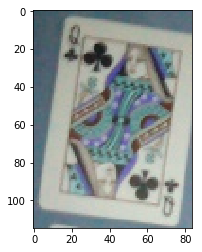

(115, 82, 3)


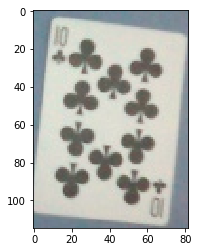

(116, 92, 3)


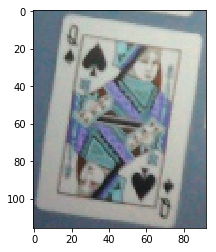

(252, 193, 3)


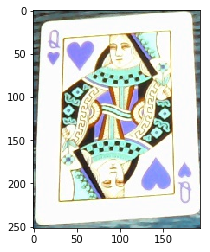

(248, 200, 3)


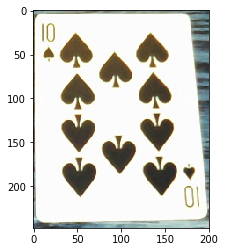

(307, 271, 3)


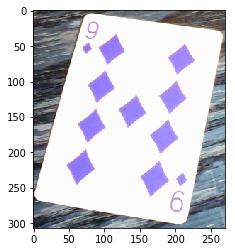

(250, 204, 3)


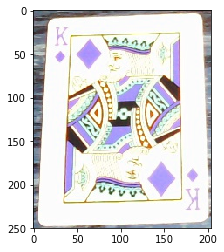

(246, 202, 3)


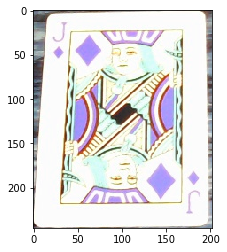

(258, 221, 3)


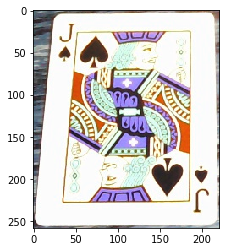

(283, 221, 3)


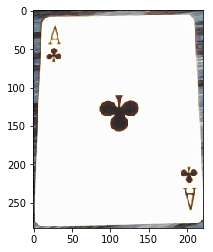

In [3]:
#display crop image
for i in range(10):
    row = train.iloc[i]
#     print(path_train)
    img = cv2.imread(os.path.join(path_train, row['filename']))
#     print(img.shape)
    xmin = row['xmin']
    xmax = row['xmax']
    ymin = row['ymin']
    ymax = row['ymax']
    crop_img = img[ymin:ymax, xmin:xmax]
    print(crop_img.shape)
    plt.imshow(crop_img)
    plt.show()

In [6]:
height_crop_image = 250
weight_crop_image = 200
def create_data():
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    classes = ['Ace_Clubs', 'Ace_Diamonds', 'Ace_Hearts', 'Ace_Spades',  
               '9_Clubs', '9_Diamonds', '9_Hearts', '9_Spades', 
               '10_Clubs', '10_Diamonds', '10_Hearts', '10_Spades', 
               'Jack_Spades', 'Jack_Clubs', 'Jack_Diamonds', 'Jack_Hearts', 'Jack_Spades', 
               'Queen_Clubs', 'Queen_Diamonds', 'Queen_Hearts', 'Queen_Spades', 
               'King_Clubs', 'King_Diamonds', 'King_Hearts', 'King_Spades']
    
    m_train = train.shape[0]
    m_test = test.shape[0]
    
    for i in range(m_train):
        row = train.iloc[i]
        img = cv2.imread(os.path.join(path_train, row['filename']))
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        c = row['class']
        
        y_train.append(classes.index(c))
        crop_img = img[ymin:ymax, xmin:xmax]
        crop_img = cv2.resize(crop_img, (weight_crop_image, height_crop_image))
        x_train.append(crop_img)
    
    for i in range(m_test):
        row = test.iloc[i]
        img = cv2.imread(os.path.join(path_test, row['filename']))
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        c = row['class']
        
        y_test.append(classes.index(c))
        crop_img = img[ymin:ymax, xmin:xmax]
        crop_img = cv2.resize(crop_img, (weight_crop_image, height_crop_image))
        x_test.append(crop_img)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train, y_train, x_test, y_test, classes
 


In [7]:
x_train_org, y_train_org, x_test_org, y_test_org, classes = create_data()
print(x_train_org.shape)
print(y_train_org.shape)
print(x_test_org.shape)
print(y_test_org.shape)
print(classes)

(516, 250, 200, 3)
(516,)
(143, 250, 200, 3)
(143,)
['Ace_Clubs', 'Ace_Diamonds', 'Ace_Hearts', 'Ace_Spades', '9_Clubs', '9_Diamonds', '9_Hearts', '9_Spades', '10_Clubs', '10_Diamonds', '10_Hearts', '10_Spades', 'Jack_Spades', 'Jack_Clubs', 'Jack_Diamonds', 'Jack_Hearts', 'Jack_Spades', 'Queen_Clubs', 'Queen_Diamonds', 'Queen_Hearts', 'Queen_Spades', 'King_Clubs', 'King_Diamonds', 'King_Hearts', 'King_Spades']


In [14]:
from tensorflow.keras.utils import to_categorical

x_train = x_train_org / 255.0
x_test = x_test_org / 255.0
#y_train = to_categorical(y_train_org, 24)
#y_test = to_categorical(y_test_org, 24)

y_train = y_train_org
y_test = y_test_org

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [19]:
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import MaxPooling2D

#from tensorflow.keras.utils import np_utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K

import tensorflow.keras

import matplotlib.pyplot as plt
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(25, activation='softmax'))
#opt_rms = tf.keras.optimizers.RMSProp(lr=0.001,decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [21]:
model.fit(x=x_train, y=y_train, epochs = 120, verbose = 1,
         validation_data=(x_test,y_test))

Train on 516 samples, validate on 143 samples
Epoch 1/120
516/516 [==============================] - 275s 534ms/sample - loss: 14.6139 - acc: 0.0853 - val_loss: 10.6888 - val_acc: 0.0210
Epoch 2/120
516/516 [==============================] - 277s 537ms/sample - loss: 13.7277 - acc: 0.1279 - val_loss: 15.1928 - val_acc: 0.0559
Epoch 3/120
516/516 [==============================] - 276s 535ms/sample - loss: 13.2486 - acc: 0.1589 - val_loss: 15.4794 - val_acc: 0.0420
Epoch 4/120
516/516 [==============================] - 275s 534ms/sample - loss: 12.7374 - acc: 0.2035 - val_loss: 15.7236 - val_acc: 0.0210
Epoch 5/120
516/516 [==============================] - 275s 532ms/sample - loss: 13.0229 - acc: 0.1860 - val_loss: 15.1841 - val_acc: 0.0490
Epoch 6/120
516/516 [==============================] - 273s 529ms/sample - loss: 12.2266 - acc: 0.2326 - val_loss: 15.5926 - val_acc: 0.0350
Epoch 7/120
516/516 [==============================] - 273s 529ms/sample - loss: 11.9802 - acc: 0.2461 - val

516/516 [==============================] - 270s 524ms/sample - loss: 12.3070 - acc: 0.2345 - val_loss: 15.4881 - val_acc: 0.0420
Epoch 59/120
516/516 [==============================] - 271s 526ms/sample - loss: 11.3446 - acc: 0.2888 - val_loss: 14.4738 - val_acc: 0.1049
Epoch 60/120
516/516 [==============================] - 271s 525ms/sample - loss: 9.5380 - acc: 0.4070 - val_loss: 15.0980 - val_acc: 0.0629
Epoch 61/120
516/516 [==============================] - 270s 524ms/sample - loss: 9.5115 - acc: 0.4128 - val_loss: 14.4764 - val_acc: 0.1049
Epoch 62/120
516/516 [==============================] - 271s 526ms/sample - loss: 9.4559 - acc: 0.4147 - val_loss: 14.5719 - val_acc: 0.0909
Epoch 63/120
516/516 [==============================] - 270s 523ms/sample - loss: 9.4177 - acc: 0.4186 - val_loss: 13.7380 - val_acc: 0.1469
Epoch 64/120
516/516 [==============================] - 271s 524ms/sample - loss: 9.4265 - acc: 0.4167 - val_loss: 12.7808 - val_acc: 0.1958
Epoch 65/120
516/516 [==

516/516 [==============================] - 272s 527ms/sample - loss: 9.0789 - acc: 0.4380 - val_loss: 12.2497 - val_acc: 0.2378
Epoch 117/120
516/516 [==============================] - 270s 523ms/sample - loss: 9.0121 - acc: 0.4438 - val_loss: 12.1709 - val_acc: 0.2448
Epoch 118/120
516/516 [==============================] - 271s 525ms/sample - loss: 9.0572 - acc: 0.4399 - val_loss: 12.0786 - val_acc: 0.2517
Epoch 119/120
516/516 [==============================] - 270s 524ms/sample - loss: 9.0538 - acc: 0.4399 - val_loss: 11.9949 - val_acc: 0.2587
Epoch 120/120
516/516 [==============================] - 271s 526ms/sample - loss: 9.2244 - acc: 0.4302 - val_loss: 12.0733 - val_acc: 0.2448


In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Split the train and the validation set for the fitting
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)
datagen.fit(x_train)
model.fit_generator(
    datagen.flow(x_train, y_train),
    epochs=30,
    validation_data = (x_test, y_test), 
    steps_per_epoch=x_train.shape[0]
)

Epoch 1/30


ImportError: Image transformations require SciPy. Install SciPy.